In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


#Created in Visual Studio Code | Jupyter Notebook | Python Interpreter 3.12.2

In [2]:
file_path1 = 'C:/Users/navji/Downloads/NavjitSinghInterviewCode/people.csv'
file_path2 = 'C:/Users/navji/Downloads/NavjitSinghInterviewCode/services.csv'
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

In [3]:
df = pd.merge(df1, df2, on='id', how='inner')

In [4]:
df

,Unnamed: 0_x,id,age,Unnamed: 0_y,event,count,date
0,0,10000,62.0,0,address_change,1,86
1,1,10002,35.0,1,mental_health_service,1,467
2,1,10002,35.0,2,address_change,1,561
3,1,10002,35.0,3,snap_enroll,1,347
4,1,10002,35.0,4,medicaid_enrollment,1,580
...,...,...,...,...,...,...,...
3497,709,10998,44.0,3497,address_change,1,48
3498,709,10998,44.0,3498,civil_court_case,1,725
3499,710,10999,37.0,3499,civil_court_case,1,345
3500,710,10999,37.0,3500,snap_enroll,1,102


In [5]:
df = df.drop(columns=(['Unnamed: 0_x', 'Unnamed: 0_y', 'count']), axis=1)

In [6]:
#na1 = df.isna().sum()
#na1
df['age'] = df['age'].fillna(df['age'].mean())
#df.info()
df

,id,age,event,date
0,10000,62.0,address_change,86
1,10002,35.0,mental_health_service,467
2,10002,35.0,address_change,561
3,10002,35.0,snap_enroll,347
4,10002,35.0,medicaid_enrollment,580
...,...,...,...,...
3497,10998,44.0,address_change,48
3498,10998,44.0,civil_court_case,725
3499,10999,37.0,civil_court_case,345
3500,10999,37.0,snap_enroll,102


In [7]:
dummies = pd.get_dummies(df['event'])
dummies = dummies.astype(int)
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=['event'])
df


,id,age,date,address_change,civil_court_case,er_visit,medicaid_enrollment,mental_health_service,physical_health_service,snap_enroll
0,10000,62.0,86,1,0,0,0,0,0,0
1,10002,35.0,467,0,0,0,0,1,0,0
2,10002,35.0,561,1,0,0,0,0,0,0
3,10002,35.0,347,0,0,0,0,0,0,1
4,10002,35.0,580,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3497,10998,44.0,48,1,0,0,0,0,0,0
3498,10998,44.0,725,0,1,0,0,0,0,0
3499,10999,37.0,345,0,1,0,0,0,0,0
3500,10999,37.0,102,0,0,0,0,0,0,1


#Noted within different interpreters that False/binary int format changes

In [8]:
#maxage = df['age'].max()
#minage = df['age'].min()
#maxage
#minage

'''Looking through the data, there are no real data outliers when it comes to age, it is somewhat Gaussian although there is an even spread with the median being around middle age.
Fixed and replaced naans with the mean. Dummies created are binary and as a result it looks like there is no major #need to do an indepth EDA.'''

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from patsy import dmatrices
#Our objective is to have er_visit(classification) as target variable
#Use other events, and age as predictor variables


#formula = 'er_visit ~ age + date + address_change + civil_court_case + medicaid_enrollment + mental_health_service + physical_health_service + snap_enroll'
x = df.drop(['er_visit'], axis =1)
y = df['er_visit']



In [10]:
#na1 = df.isna().sum()
#na1

#Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

'''I am splitting the data into 70/30 as we have a limited amount of rows (less than 5000) I am trying to make sure that as many possible instances of each event can be validated correctly.'''

<class 'pandas.core.frame.DataFrame'>
Index: 2451 entries, 3425 to 1061
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2451 non-null   int64  
 1   age                      2451 non-null   float64
 2   date                     2451 non-null   int64  
 3   address_change           2451 non-null   int32  
 4   civil_court_case         2451 non-null   int32  
 5   medicaid_enrollment      2451 non-null   int32  
 6   mental_health_service    2451 non-null   int32  
 7   physical_health_service  2451 non-null   int32  
 8   snap_enroll              2451 non-null   int32  
 9   er_visit                 2451 non-null   int32  
dtypes: float64(1), int32(7), int64(2)
memory usage: 208.2 KB


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'date'}>],
       [<Axes: title={'center': 'address_change'}>,
        <Axes: title={'center': 'civil_court_case'}>,
        <Axes: title={'center': 'medicaid_enrollment'}>],
       [<Axes: title={'center': 'mental_health_service'}>,
        <Axes: title={'center': 'physical_health_service'}>,
        <Axes: title={'center': 'snap_enroll'}>],
       [<Axes: title={'center': 'er_visit'}>, <Axes: >, <Axes: >]],
      dtype=object)

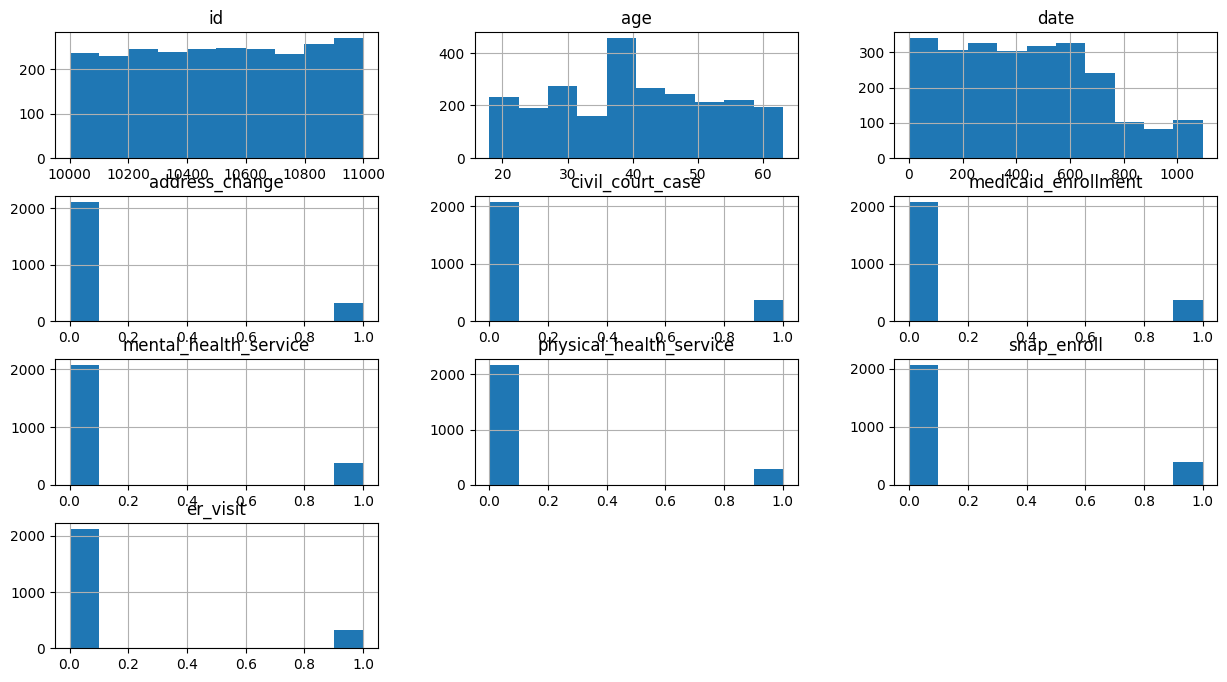

In [11]:
train = x_train.join(y_train)
train.info()
#train
train.hist(figsize=(15, 8))

<Axes: >

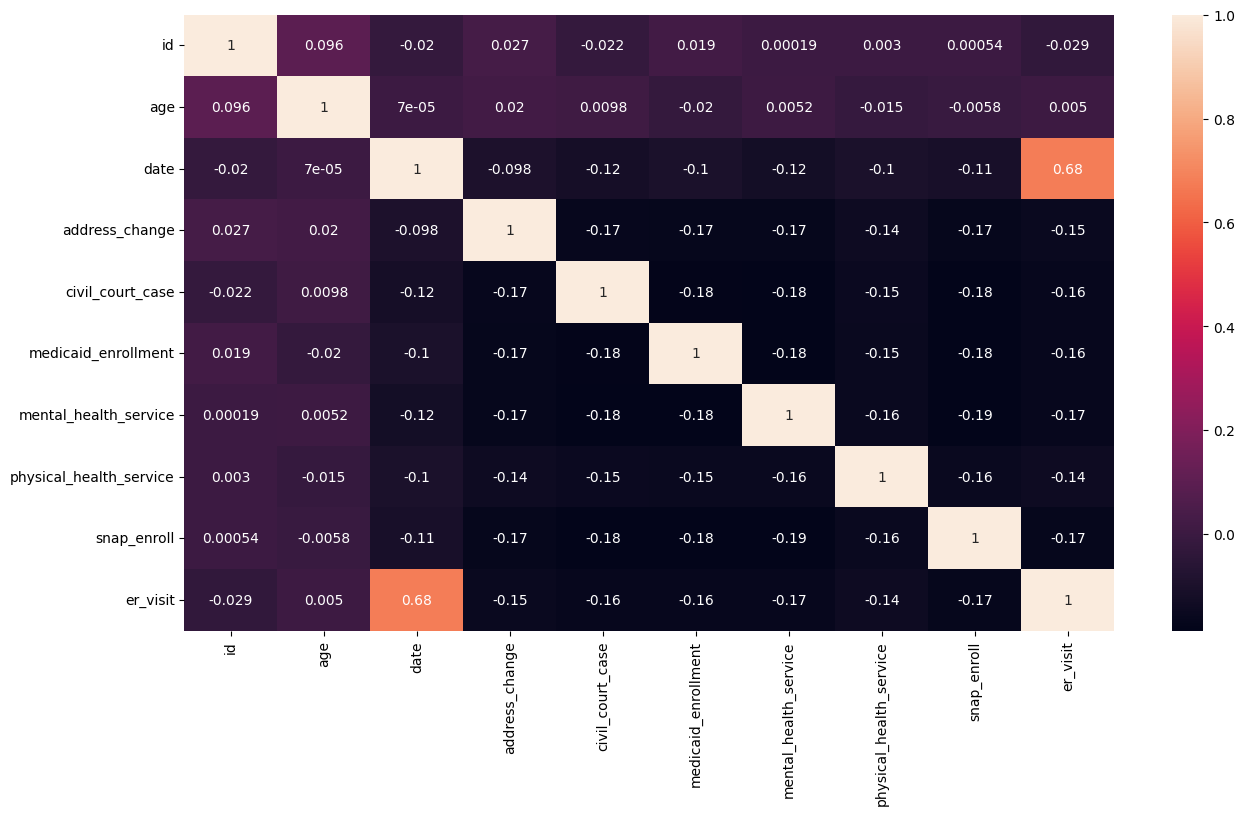

In [12]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.heatmap(train.corr(), annot=True)

'''There is a HUGE spike for date when it comes to understanding er_visit, this is true only for er_visit. Possibly has something to do with post-incident checkup, etc. depending on the context of data. This sounds realistic as time is a real factor for health. Will need to keep note. Other variables are constant and have little to medium impact on er_visit'''

'''I am reluctant to change or add features based on date as there is a large correlation with er visit for some reason, will skip feature engineering for this iteration however I think it is worth to note that there is a lot of data when it comes to understanding time basis on er visit incidents. The other features also do not seem to have a high correlation, more data is not necessary for them.'''

In [15]:
#Scaling and fitting data to the model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#target variable is usually not scaled
x_train, y_train = train.drop(['er_visit'], axis= 1), train['er_visit']
x_train_s = scaler.fit_transform(x_train)

#Below we have applied L2 Ridge regularization method to penalize coefficents
model = LogisticRegression(penalty='l2', solver='liblinear')
model.fit(x_train, y_train)



LogisticRegression(solver='liblinear')

After looking through the equation that I was given as well as the nature of er_visit that logistic regression that is regularized(L2) by ridge regression is the most effective model.
There also exists the ridge regression model itself within scikit-learn which I have included in the bottom however this is mostly used for continuous target variables.
Er_visit is classification and logistic regression regularized by ridge regression (L2) is the most appropriate model. 

Ridge regression in the context of L2 is a means of fitting the data, there is both lasso and ridge. In the context of this model we utilize L2 which is a method of affecting the coefficients within our model. Based on our previous observation of the date coefficient having such a large correlation it would be useful to use L2 to penalize this coefficient within the regression model among others, ridge regression equally affects all variables, you can also adjust the magnitude by changeing the alpha within the model fit.

Ridge regression helps with multicollinearity and parameter tuning by equally distributing a penalization to predictor variables, stabilizing the model and making less noise within the model making it more efficient and less biased.

I found that applying scaler reduces accuracy significantly. Made sure to exclude that and to keep normal train for fitting the data (change of -40%).

'''I am a little bit confused when the assignment has asked me to provide a 'ridge regression' as this is a classification problem(understanding er_visit binary classification). For this iteration I will provide logistic regression with L2 ridge regularization to fit the data. I will also provide a commented out Ridge model below, if this is the appropriate model you are seeking. In my opinion regularized(Ridge L2) logistic regression is the most appropriate.'''

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

pred = model.predict(x_test)

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
roc = roc_auc_score(y_test, pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("Area Under ROC: ", roc)



Accuracy:  0.9885823025689819
Precision:  0.9754601226993865
Recall:  0.9520958083832335
Area Under ROC:  0.9737854607527028


In [43]:
#coeffs
coefficients = model.coef_
for i, coef in enumerate(coefficients[0]):
    print(f"Coefficient for feature {i}: {coef}")

Coefficient for feature 0: -0.006426792090723382
Coefficient for feature 1: 0.0015139757906968909
Coefficient for feature 2: 0.09029655764465556
Coefficient for feature 3: -0.0002476888256883041
Coefficient for feature 4: -0.0003076483980081201
Coefficient for feature 5: -0.000369095181584745
Coefficient for feature 6: -0.0006782584322027229
Coefficient for feature 7: -0.00023833465967282785
Coefficient for feature 8: -0.0003889008501202791


In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
pred2 = ridge.predict(x_test)

Ridge()